<a id='intro'></a>
# Noshow Appointment


## Introduction

### Noshow Appointment Dataset Description 
> **NoshowAppointment** dataset shows information about the appointment booked or taken but not honored in Brazil by patients .There are about 110527 of rows in the table and has 14 columns.<br>
**List of Columns and their meanings**<br>
**PatientId**:*This is the identification of the patient*<br>
**AppointmentId**:*This is the identification of the appointment booked by the patient*<br>
**Gender**:*This identifies a patient as male of female*<br>
**ScheduledDay**:*This is the day the appointment was offered*<br>
**AppointmentDay**:*This is the day of the appointment - The said patient ought to show at this date. This date is always later than the scheduledDay*<br>
**Age**:*This is the age of the patient*<br>
**Neibourhood**:*The place of the appointment*<br>
**Scholarship**:*The Brazillian scholarship scheme for patients*<br>
**Hipertension**:*If the patient is with hipertension*<br>
**Diabetes**:*If the patient is with diabetes*<br>
**Alcoholism**:*If the patient is with alcoholism*<br>
**Handcap**:*If the patient is handicapped*<br>
**SMS_received**:*If the patient had received sms about the appointment*<br>
**No-show**:*If the patient showed up for the appointment. In this case, if yes, it means the patient did not show up but no means the patient showed up*<br>
					
### Question(s) for Analysis
>**Question 1**: Could the interval between the sheduled day and the Appointment day be used to predict the a patient will show up for an appointment?

>**Question 2**: Could the response to appointment be attributed to the age of the patient?

>**Question 3**: What size of patient with any of the ailment(Hipertention, Diabetes, Handicap, Alcoholism) showed up?

>**Question 4**: What could be the possible cause(s) of no-show by the paients?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

>**Loading data**: The `noshowappointment.csv` data loaded and the first 3 rows printed 

In [2]:
# Load data and print out 3 lines. 
df = pd.read_csv('noshowappointment.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


>**Dimension of the dataframe**

In [3]:
df.shape

(110527, 14)

>Basic information about the dataframe. Finding the datatype of each column and their entries

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>Check for `isna()` to see if any column has null value 

In [6]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


<!---### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).--->
data cleaning Info here
 

### Data Cleaning
>The dataset loaded above is fairly clean but there are few cleanings to be done here. There is no evidence of missing data in all the columns

>The ScheduledDay datatype is object but it is supposed to be datetime<br>
The AppointmentDay datatype is object but it is supposed to be datetime also<br>
`No-show` will be changed to `No_show`. This is to be consistence in naming variables

In [7]:
#No-show column to No_show for consistency
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Could the interval between the sheduled day and the Appointment day be used to predict the a patient will show up for an appointment?

Looking at `No_show` column

In [8]:
df['No_show'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['No_show'].describe()

count     110527
unique         2
top           No
freq       88208
Name: No_show, dtype: object

Finding the difference between scheduled and appointment Days

In [10]:
df[['ScheduledDay','AppointmentDay']].head()

,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29
2,2016-04-29 16:19:04,2016-04-29
3,2016-04-29 17:29:31,2016-04-29
4,2016-04-29 16:07:23,2016-04-29


Removing the timestamp from the Scheduled date since there is no much to do with the time

In [11]:
#Stripping off the time - it will return datatype of object
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
# Change it again to datetime because it has turned to object datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
# Output the head() of the two columns set
df[['ScheduledDay','AppointmentDay']].head()

,ScheduledDay,AppointmentDay
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29


Create a new column to find the waiting days - The appointment days are always later than the schedule days

In [12]:
# Different btw Appointment and Scheduled serve as the waiting days. 
#The column Waiting_days also created and also stripped off the days using 'dt.days' making it int not object
df['Waiting_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

Distribution of Waiting Days

In [13]:
df['Waiting_days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_days, dtype: float64

From the discription above the `min` shows that atleast one negative value exisys for `Waiting_days`. This is not right because one cannot go to schedule appointment and have the appointment date in the past

**Get all the rows with Waiting_days less than 0**

In [14]:
df[df['Waiting_days'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Waiting_days
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


There are 6 rows with `Waiting_days` values less than zero. These should be excluded from the dataset

In [15]:
# Excluding rows with Waiting_days values less than zero(0)
df = df[df['Waiting_days'] >= 0]

# Then check
df[df['Waiting_days'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Waiting_days


In [16]:
#Waiting_days description
df['Waiting_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_days, dtype: float64

**Graphical View of Waiting_days Distribution**

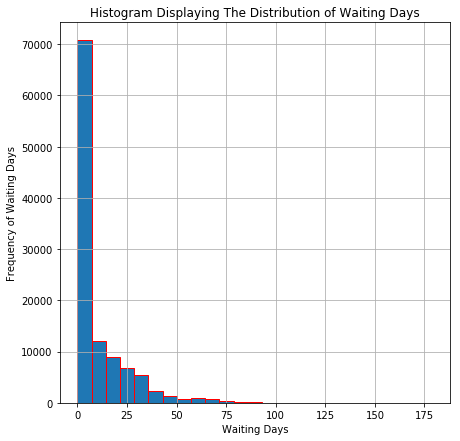

In [17]:
df['Waiting_days'].hist(bins=25, linewidth=1, edgecolor="red", figsize = (7,7));
plt.xlabel('Waiting Days');
plt.ylabel('Frequency of Waiting Days');
plt.title('Histogram Displaying The Distribution of Waiting Days');

Finding the average waiting days of **Show** and **No_show**

In [18]:
# function to output Waiting_days average grouped by No_show
def grpMean(dframe,grpby,meanvari):
    return dframe.groupby([grpby]).mean()[meanvari]


grpMean(df, 'No_show', 'Waiting_days')

No_show
No      8.754659
Yes    15.835484
Name: Waiting_days, dtype: float64

Pie Chart representation of this

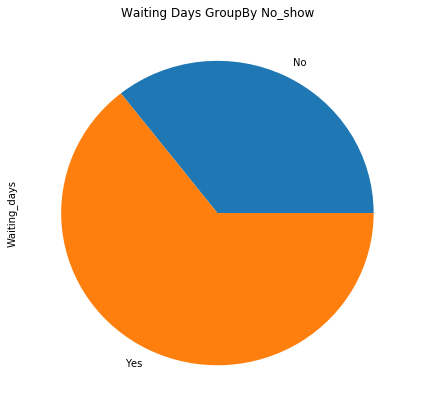

In [21]:
df.groupby(['No_show']).mean().Waiting_days.plot.pie(figsize =(7,7));
plt.title('Waiting Days GroupBy No_show');

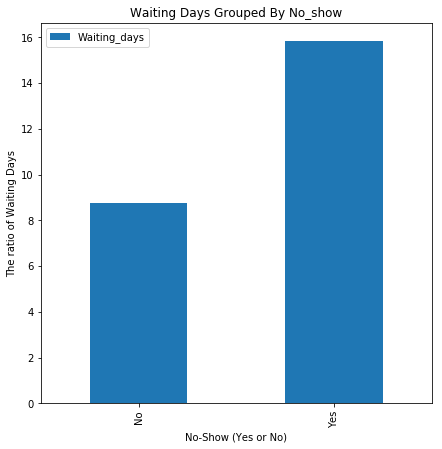

In [24]:
df.groupby(['No_show'])[['Waiting_days']].mean().plot(kind = 'bar', figsize =(7,7));
plt.ylabel('The ratio of Waiting Days');
plt.xlabel('No-Show (Yes or No)');
plt.title("Waiting Days Grouped By No_show");

The No bar depicts that the patients showed up. Therefore, it shows that less than average of 10 days showed up

### Question 2: Could the response to appointment be attributed to the age of the patient?

**Get Age distribution**

In [25]:
# Using describe to get more information about the age
df['Age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [26]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Waiting_days
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


The `.min()` shows that there is an age recorded as -1. The row should be remove as it is invalid

In [27]:
#excluding the row(s) with negative age
df2 = df[df['Age'] != -1]
df2["Age"].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

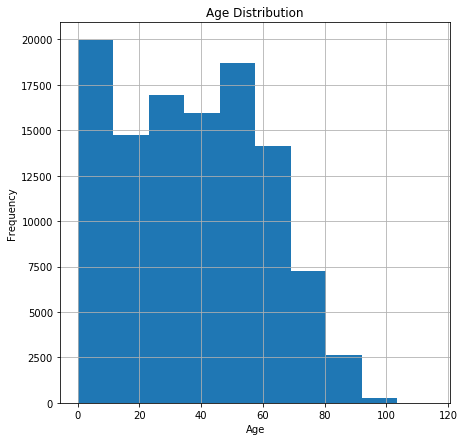

In [31]:
#Age distribution on histogram
df2['Age'].hist(figsize = (7,7));
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.title('Age Distribution');

Infants are also in this distribution. The Modal age appears to be the patients aged between 0 and 10

Using `groupby`, we will find mean of those that showed up in the appointment according to age

In [39]:
# df_age_mean = df2.groupby(["No_show"]).mean().Age
# df_age_mean
grpMean(df2,'No_show','Age')

No_show
No     37.790504
Yes    34.317667
Name: Age, dtype: float64

**Visualize**

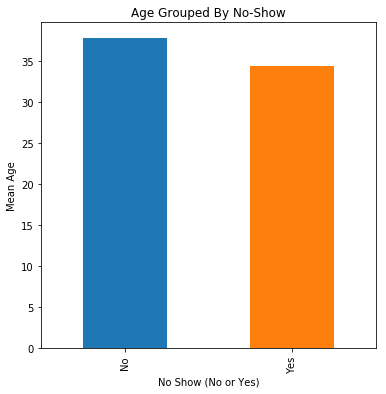

In [38]:
#group mean age by No-show and assign to df_age_mean
df_age_mean = grpMean(df2,'No_show', 'Age')

#Create function to run from anywhere
def barPlot(dframe,a,b,xlabel,ylabel,title):
    dframe.plot.bar(figsize = (a,b), subplots = False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
    
#Run the barPlot function to show the bar chart
barPlot(df_age_mean,6,6,'No Show (No or Yes)','Mean Age','Age Grouped By No-Show');


### Question 3: What size of patient with any of the ailment(Hipertention, Diabetes, Handicap, Alcoholism) showed up?

Text(0,0.5,'Ailments')

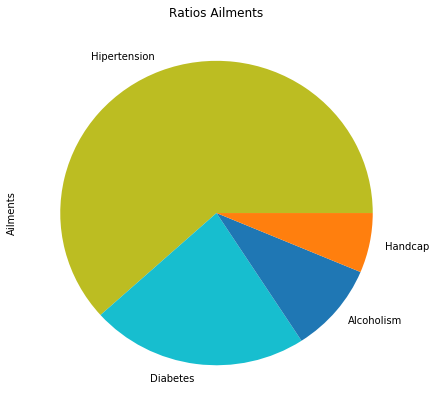

In [52]:
df4 = df2[df2[["Hipertension","Diabetes","Alcoholism","Handcap"]]>0].count()
df4.plot.pie(figsize = (7,7), subplots = False)
plt.title('Ratios Ailments');
plt.ylabel('Ailments')

More patients suffered Hipertension

**Get dataset involving only the required columns**

In [53]:
df3 = df2[["Hipertension","Diabetes","Alcoholism","Handcap","No_show"]]
meanvari = ["Hipertension","Diabetes","Alcoholism","Handcap"]
#call grpmean function
pl = grpMean(df3,'No_show',meanvari)
grpMean(df3,'No_show',meanvari)

,Hipertension,Diabetes,Alcoholism,Handcap
No_show,,,,
No,0.204394,0.073838,0.030417,0.022742
Yes,0.169042,0.064085,0.030340,0.020212


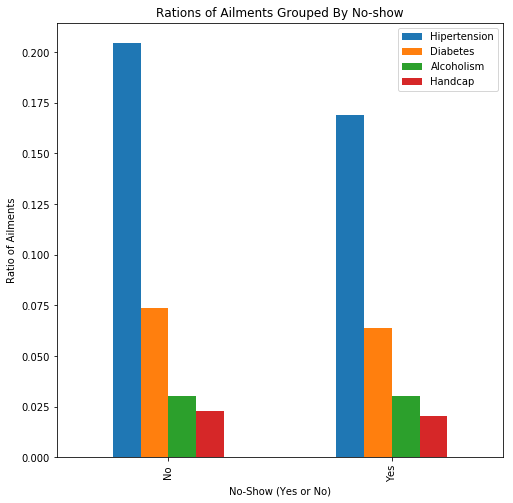

In [54]:
# pl.plot.bar(figsize=(8, 8), subplots=False);

#call barplot function
barPlot(pl,8,8,'No-Show (Yes or No)','Ratio of Ailments', 'Rations of Ailments Grouped By No-show')

### Question 4: What could be the major cause(s) of no-show by the paients?

**We will look at the relationship that exist between any of these columns and No_show**

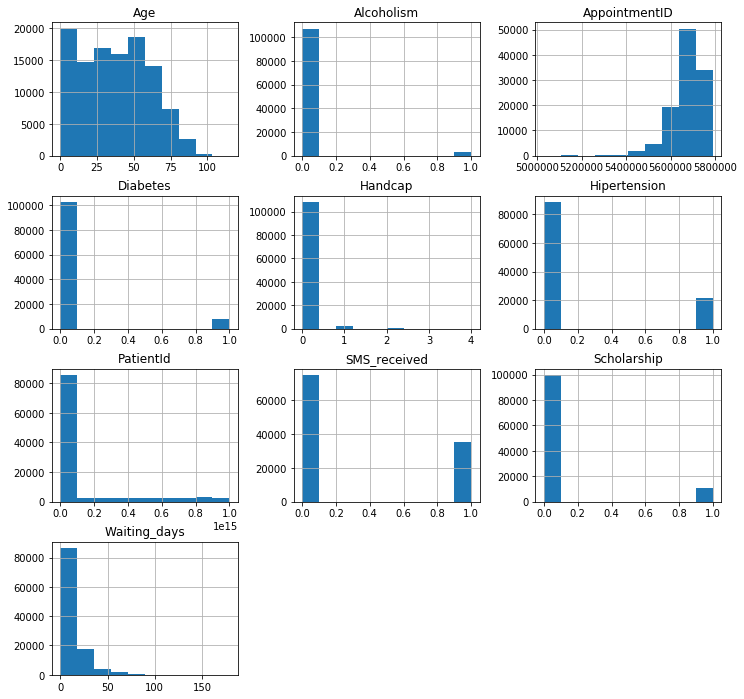

In [78]:
# To view all features
df2.hist(figsize = (12,12));

In [54]:
df4 = df2
# print head
df4.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Waiting_days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Age  SMS_received  Waiting_days  Scholarship
No_show Gender                                                    
No      F       39.591126      0.305389      9.093318     0.117862
        M       34.461372      0.265358      8.128803     0.049609
Yes     F       36.161264      0.460558     16.030635     0.144336
        M       30.835168      0.396737     15.466788     0.061116

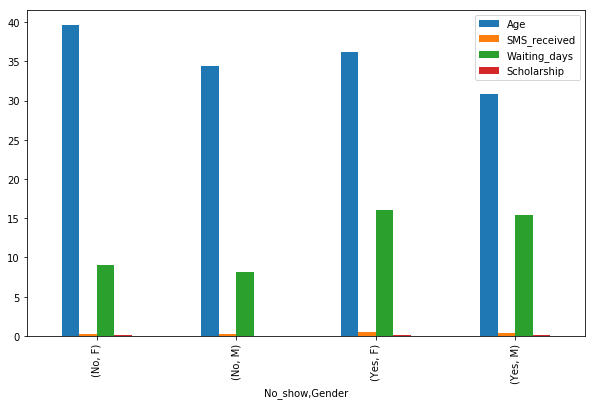

In [73]:
df5 = df2.groupby(["No_show","Gender"]).mean()[["Age","SMS_received","Waiting_days","Scholarship"]]
df5.plot.bar(figsize=(10, 6), subplots=False);
df2.AppointmentDay.dt.dayofweek.describe()
df5

<a id='conclusions'></a>
## Conclusions
> **Question 1**: Could the interval between the sheduled day and the Appointment day be used to predict the a patient will show up for an appointment?<br>
**Answer**: From the pie chart of `Waiting_days`, we notice that the mean proportion of the `Waiting_days` for `No` is smaller than `Yes`(No = 8.754659, Yes = 15.831489). Therfore, the longer the number of days a patient had to wait between the `ScheduledDay` and `AppointmentDay`, the more likely he/she will not show up

> **Question 2**: Could the response to appointment be attributed to the age of the patient?<br>
**Answer**: Following what we have in the bar chart `No_show` plotted against `Age` shows that the older people shows up more to appointment (No = 37.790504, Yes = 34.317667)

> **Question 3**: What size of patient with any of the ailment(Hipertention, Diabetes, Handicap, Alcoholism) showed up?<br>
**Answer**: The number patients that showed up in the four ailments (Hipertension, Diabetes, Alcoholism, Handcap) listed are bigger that those that did not show up

> **Question 4**: What could be the possible cause(s) of no-show by the paients?<br>
**Answer**: `SMS_Received` and `Scholarship` are not the causes of `No_show` to the patients. While an aged person will prefer to take care of him/herself, longer `Waiting_days` tend to discourage patients from catching up with the appointment.<br>

**It will be also good to provide the distance attached to Neigbourhood so that analysis on distance should be checked to know if it causes `No_show` by the patient**

**Limitation**: The dataset cannot help us to answer directly why the `No_show`. From the analysis, it is shown that older people showed up more but we can't tell why. It could be that the adults know how to care for themselves.

In [79]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0